In [21]:
import json
def getPlotData(fileName, mixed_type):
    with open(fileName, 'r') as file:
        data_all_a = json.load(file)

    y_x_a = []
    if mixed_type==0:
        for data in data_all_a:
            total = float(data["Packets"]["Unconfirmed"])
            success = float(data["Packets"]["UnconfirmedSuccess"])
            if total>0:
                d = (success/total,total/float(data["SimTime"]))
                y_x_a.append(d)
    elif mixed_type==1:
        for data in data_all_a:
            total = float(data["Packets"]["Confirmed"])
            success = float(data["Packets"]["ConfirmedSuccess"])
            if total>0:
                d = (success/total,total/float(data["SimTime"]))
                y_x_a.append(d)
    elif mixed_type==2:
        for data in data_all_a:
            total = float(data["CPSR"]["Total"])
            success = float(data["CPSR"]["Success"])
            if total>0:
                d = (success/total,total/float(data["SimTime"]))
                y_x_a.append(d)
    else:
        for data in data_all_a:
            d = (float(data["ULPDR"]["Success"])/float(data["ULPDR"]["Total"]),float(data["ULPDR"]["Total"])/float(data["SimTime"]))
            y_x_a.append(d)

    y_x_a.sort(key=lambda x: x[1])

    y = [d[0] for d in y_x_a]
    x = [d[1] for d in y_x_a]
    return x,y

In [22]:
import numpy as np

def find_outliers_zscore(x, y, l_threshold=0.1, h_threshold=5):

    x = np.array(x)
    y = np.array(y)

    z_scores_y = np.abs((y - np.mean(y)) / np.std(y))

    filtered_indices = np.where((z_scores_y > l_threshold) & (z_scores_y < h_threshold))[0]
    filtered = [(x[i], y[i]) for i in filtered_indices]

    return filtered


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def create_plot(fileNamex, labelx, mixed_type, degree, line_style, marker_style):
    x,y = getPlotData(fileNamex, mixed_type)

    plt.xscale('log')

    filtered = find_outliers_zscore(x, y)
    
    x = [d[0] for d in filtered]
    y = [d[1] for d in filtered]

    df = pd.DataFrame({"X Values": x, "Y Values": y})
    
    coefficients = np.polyfit(df['X Values'], df['Y Values'], degree)
    polynomial = np.poly1d(coefficients)
    df['y_fitted'] = polynomial(df['X Values'])

    plt.plot(df['X Values'], df['y_fitted'], label=f'{labelx}', linestyle=line_style, marker=marker_style, color='black', markerfacecolor='None')

    plt.legend()


    # plt.tight_layout()
    plt.xlim([0.01,2])
    plt.ylim([0.8,1.0])

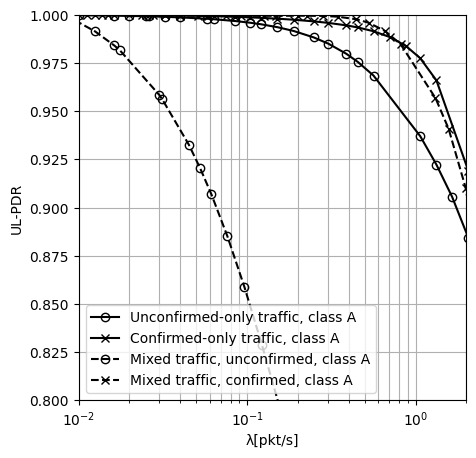

In [24]:
create_plot('final_sim/test_scenario_baseline/True/ULPDR_UNCONFIRMED_A', 'Unconfirmed-only traffic, class A',-1,7,'-','o')

create_plot('final_sim/test_scenario_baseline/True/ULPDR_CONFIRMED_A', 'Confirmed-only traffic, class A',-1,7,'-','x')
create_plot('final_sim/test_scenario_baseline/True/ULPDR_MIXED_A', 'Mixed traffic, unconfirmed, class A',0,7,'--','o')
create_plot('final_sim/test_scenario_baseline/True/ULPDR_MIXED_A', 'Mixed traffic, confirmed, class A',1,7,'--','x')


f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.ylabel('UL-PDR')
plt.xlabel('λ[pkt/s]')
plt.grid(True, which='both')


plt.show()

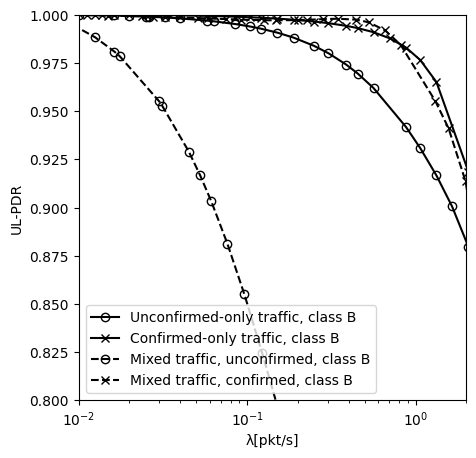

In [25]:
create_plot('final_sim/test_scenario_baseline/True/ULPDR_UNCONFIRMED_B', 'Unconfirmed-only traffic, class B',-1,7,'-','o')

create_plot('final_sim/test_scenario_baseline/True/ULPDR_CONFIRMED_B', 'Confirmed-only traffic, class B',-1,7,'-','x')
create_plot('final_sim/test_scenario_baseline/True/ULPDR_MIXED_B', 'Mixed traffic, unconfirmed, class B',0,7,'--','o')
create_plot('final_sim/test_scenario_baseline/True/ULPDR_MIXED_B', 'Mixed traffic, confirmed, class B',1,7,'--','x')


f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.ylabel('UL-PDR')
plt.xlabel('λ[pkt/s]')
plt.show()

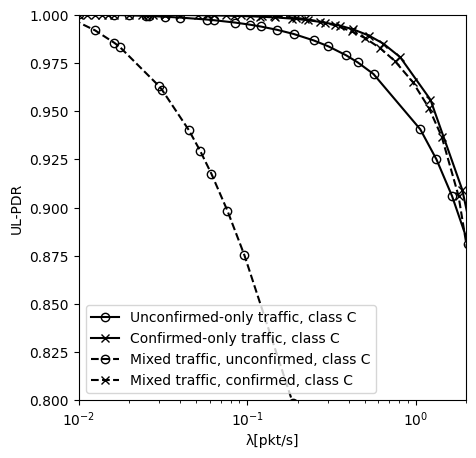

In [26]:
create_plot('final_sim/test_scenario_baseline/True/ULPDR_UNCONFIRMED_C', 'Unconfirmed-only traffic, class C',-1,6,'-','o')

create_plot('final_sim/test_scenario_baseline/True/ULPDR_CONFIRMED_C', 'Confirmed-only traffic, class C',-1,5,'-','x')
create_plot('final_sim/test_scenario_baseline/True/ULPDR_MIXED_C', 'Mixed traffic, unconfirmed, class C',0,8,'--','o')
create_plot('final_sim/test_scenario_baseline/True/ULPDR_MIXED_C', 'Mixed traffic, confirmed, class C',1,5,'--','x')


f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.ylabel('UL-PDR')
plt.xlabel('λ[pkt/s]')
plt.show()

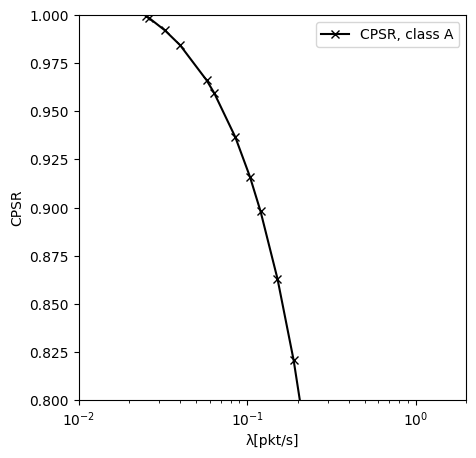

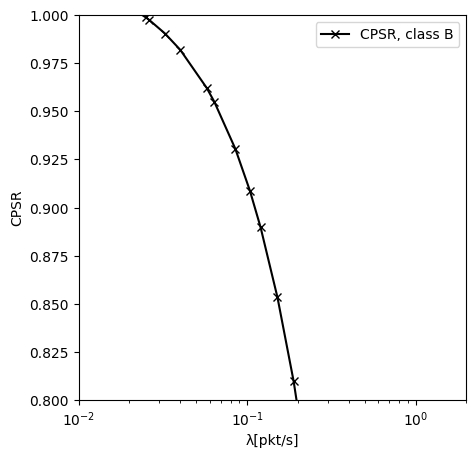

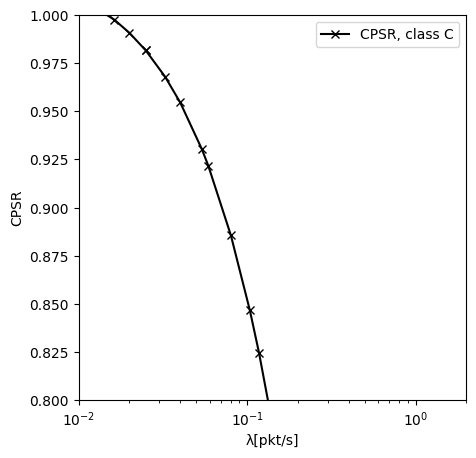

In [27]:
create_plot('final_sim/test_scenario_baseline/True/ULPDR_CONFIRMED_A', 'CPSR, class A',2,8,'-','x')

f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.ylabel('CPSR')
plt.xlabel('λ[pkt/s]')
plt.show()

create_plot('final_sim/test_scenario_baseline/True/ULPDR_CONFIRMED_B', 'CPSR, class B',2,8,'-','x')

f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.ylabel('CPSR')
plt.xlabel('λ[pkt/s]')
plt.show()

create_plot('final_sim/test_scenario_baseline/True/ULPDR_CONFIRMED_C', 'CPSR, class C',2,8,'-','x')

f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.ylabel('CPSR')
plt.xlabel('λ[pkt/s]')
plt.show()

In [28]:
import json
import matplotlib.pyplot as plt
def get_bar_plot_data(fileName):
    with open(fileName, 'r') as file:
        data_all_a = json.load(file)
        s_count=0
        u_count=0
        i_count=0
        r_count=0
        t_count=0
        for data in data_all_a:
            s_count += float(data['Metrics']['S'])
            u_count += float(data['Metrics']['U'])
            i_count += float(data['Metrics']['I'])
            r_count += float(data['Metrics']['R'])
            t_count += float(data['Metrics']['T'])
        total = u_count+i_count+r_count+t_count
        y = [(u_count/total), (i_count/total), (r_count/total), (t_count/total)]
        
        return y
        

In [29]:
import matplotlib.pyplot as plt

def generate_bar_plot(unc_file1, cn_file2, device_class):
    x = ['U', 'I', 'R', 'T']
    ulpdr_unconfirmed = get_bar_plot_data(unc_file1)
    ulpdr_confirmed = get_bar_plot_data(cn_file2)

    plt.figure(figsize=(10, 5))

    bar_width = 0.9

    bar_positions_set1= [2,6,10,14]
    bar_positions_set2= [3,7,11,15]

    plt.bar(bar_positions_set1, ulpdr_unconfirmed, width=bar_width, label='Unconfirmed', color='white', edgecolor='black', hatch='\\')
    plt.bar(bar_positions_set2, ulpdr_confirmed, width=bar_width, label='confirmed', color='white',edgecolor='black', hatch='.')

    # Add labels to the axes
    plt.ylabel('Fraction of lost packets (%)')
    plt.title(f'Class {device_class}')

    xtick_positions = [2.5, 6.5, 10.5, 14.5] 
    plt.xticks(xtick_positions, x)

    plt.legend()
    plt.ylim([0.0,1.0])
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

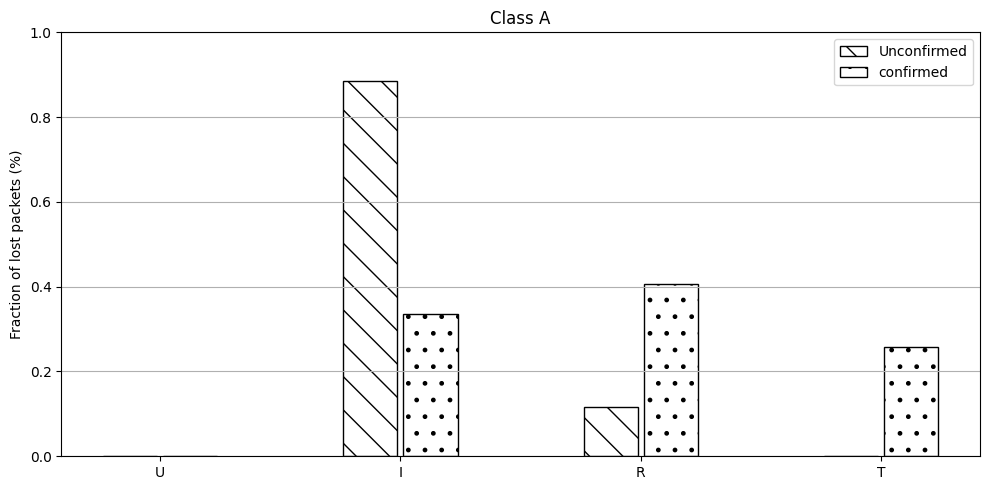

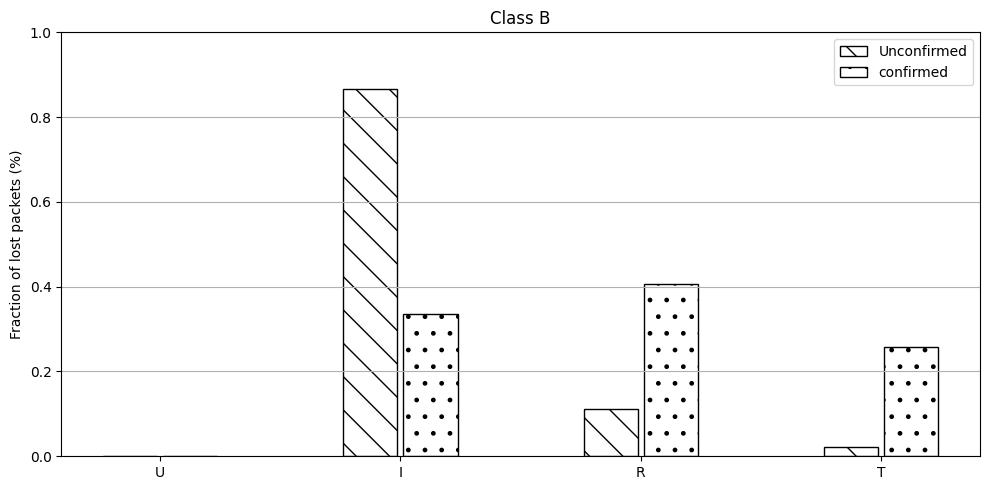

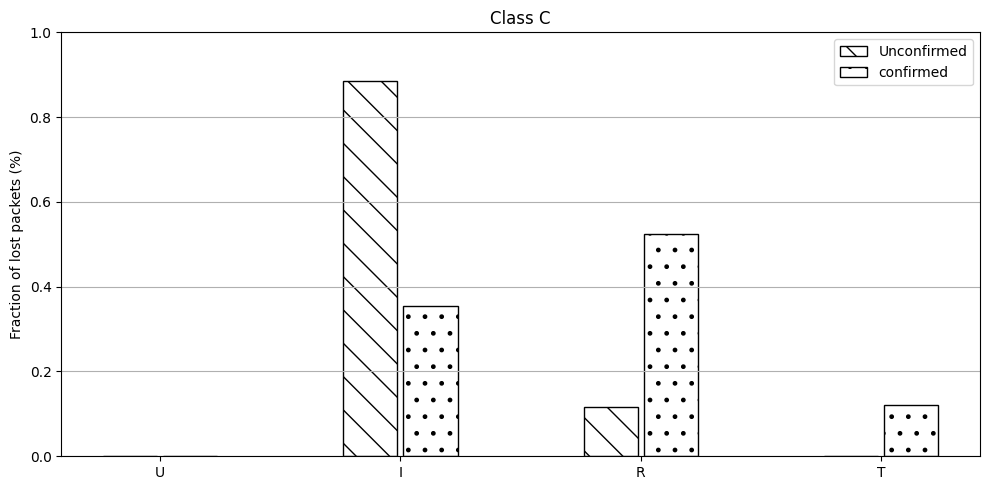

In [30]:
generate_bar_plot('final_sim/test_scenario_baseline/True/ULPDR_UNCONFIRMED_A', 'final_sim/test_scenario_baseline/True/ULPDR_CONFIRMED_A', 'A')
generate_bar_plot('final_sim/test_scenario_baseline/True/ULPDR_UNCONFIRMED_B', 'final_sim/test_scenario_baseline/True/ULPDR_CONFIRMED_B', 'B')
generate_bar_plot('final_sim/test_scenario_baseline/True/ULPDR_UNCONFIRMED_C', 'final_sim/test_scenario_baseline/True/ULPDR_CONFIRMED_C', 'C')